point check
t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


<ipython-input-7-3514a47f6216>:88: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3D = Axes3D(fig3D)


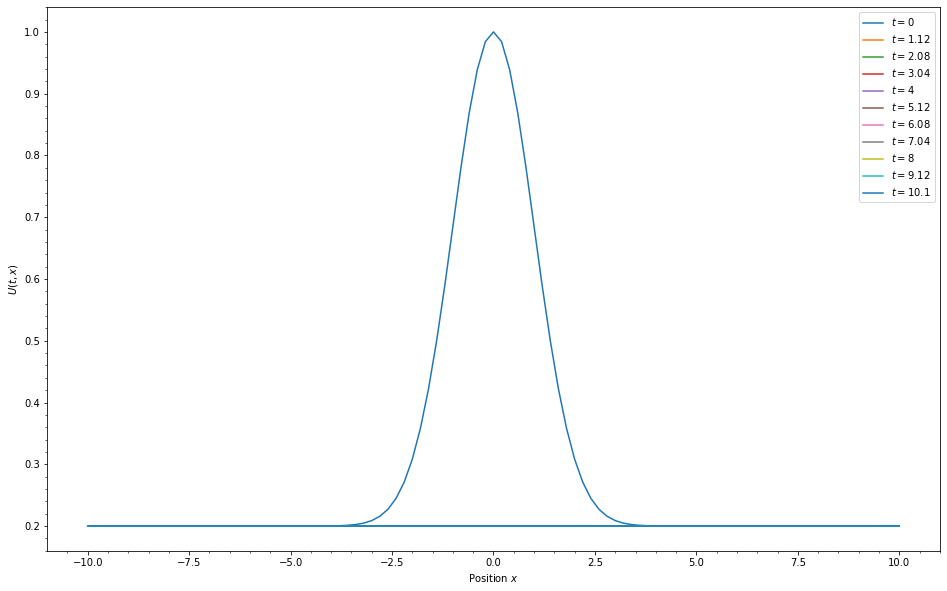

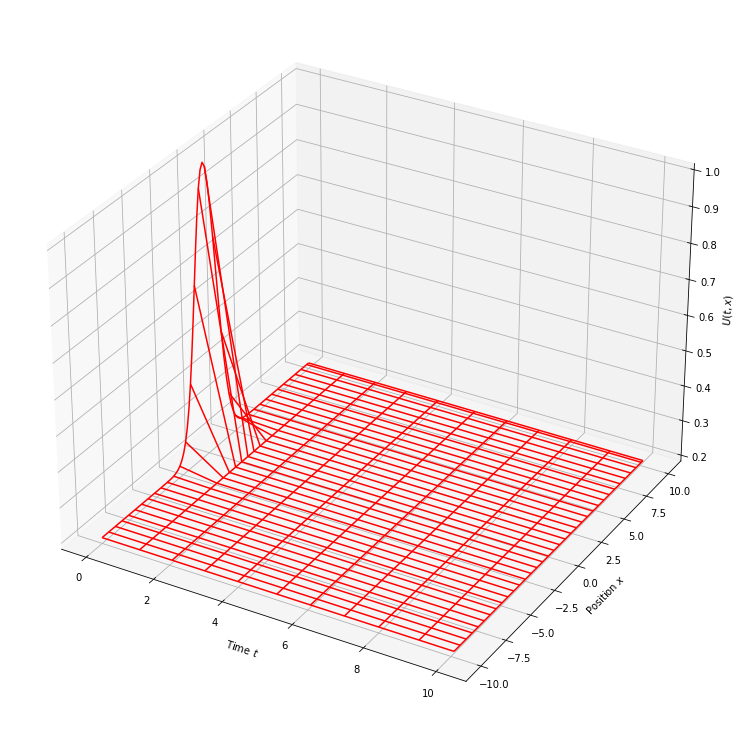

In [7]:
# Upwind method FROM LEC 10 
# EQ WE'RE SOLVING IS SAME EQUATION FROM LEC 10 EXCEPT VEL = DX/DT
# U == vel[n,j]
# aadvection term is U*dU/dx
# initial conditions are GAUSSIAN not step funct 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# NOTICE velocity changes with each U 
# so velocity is not constaant like in lec 10

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs



# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0   #start t
U = 0.2 + 0.8 * np.exp(-0.5 * x**2) # normalized gauss funct


print("point check")

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    
# upwind eq (Uold[ix]-U[ix-1])/dx 
# BUT!!! vel (dx/dt) is point dept 
#so must be incorporated into funct

    # Find the state at the next time step.
    # vel needs to be dx/dt since vel is undefined  
    if (dx/dt) > 0:
        for ix in range(1, Nx - 1):
           U[ix]=Uold[ix]-(dx/dt)*dt*(Uold[ix]-U[ix-1])/dx
               
    else:
        for ix in range(1, Nx - 1):
           U[ix]=Uold[ix]-(dx/dt)*dt*(U[ix+1]-U[ix])/dx

            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout


        
ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.add = True
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

In [ ]:
# Upwind method FROM LEC 10 
# EQ WE'RE SOLVING IS SAME EQUATION FROM LEC 10 EXCEPT VEL = DX/DT
# U == vel[n,j]
# aadvection term is U*dU/dx
# initial conditions are GAUSSIAN not step funct 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# NOTICE velocity changes with each U 
# so velocity is not constaant like in lec 10

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs



# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 1 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0   #start t
U = 0.2 + 0.8 * np.exp(-0.5 * x**2) # normalized gauss funct


print("point check")

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    
# upwind eq (Uold[ix]-U[ix-1])/dx 
# BUT!!! vel (dx/dt) is point dept 
#so must be incorporated into funct

    # Find the state at the next time step.
    if (dx/dt) > 0: #vel undefined
        for ix in range(1, Nx - 1):
           U[ix]=Uold[ix]-(dx/dt)*dt*(Uold[ix]-U[ix-1])/dx
               
    else:
        for ix in range(1, Nx - 1):
           U[ix]=Uold[ix]-(dx/dt)*dt*(U[ix+1]-U[ix])/dx

            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout


        
ax.legend()


# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()